## Логистическая регрессия

Логистическая регрессия - модель, которая используется для предсказания вероятности принадлежности образца данных к какому-нибудь классу. Если оценочная вероятность больше 50%, то можем однозначно утверждать, что образец данных принадлежит к этому классу, иначе - что не принадлежит.

## Как работает

Логистическая регрессия работает так же, как и линейная, только вместо прямой выдачи результата, как это происходит в линейной регрессии, происходит выдача результата c применением сигмовидной функции.

Сигмовидная функция имеет следующий вид: 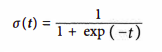

Прогноз логистической регрессии выглядит следующим образом 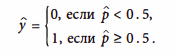

Исходя из системы уравнений выше, мы назначаем семплу метку класса, если вероятность по нему >=0.5, в противном случае, семпл не относится к данному классу

## Обучим линейную регрессию для двух классов

## Импорты

In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import numpy as np

## О датасете

Этот набор данных предназначен для банка ABC Multistate со следующими столбцами:

1. customer_id -  неиспользуемая переменная.
2. Credit_score
3. Country
4. Gender
5. Age
6. Tenure - сколько лет он/она имеет банковский счет в ABC Bank
7. Balance, 
8. Products_number - номер продукта банка
9. Credit Card
10. Active_member - является ли человек активным клиентом этого банка или нет
11. Estimated_salary - зарплата клиента банка
12. churn, используемый в качестве целевой метки. Значение 1, если клиент уходил из банка в течение какого-то периода, или 0, если нет.

## Анализ данных

In [ ]:
import pandas as pd

df = pd.read_csv('logreg.csv')
df.head()

Удалим сразу переменную customer_id, она нам не нужна

In [ ]:
df = df.drop(['customer_id'], axis = 1)
df.head(5)

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [ ]:
## Task0: закодируйте категориальные переменные,кроме целевой метки, потому что линейные модели с ними работать не умеют. Можете использовать либо pd.get_dummies, либо sklearn OneHotEncoder

In [ ]:
## Task1: визуализируйте датасет. Убедитесь, что датасет по столбцу churn несбалансирован.

Датасет несбалансирован. Это может привести к серьезной проблеме переобучения модели. Есть несколько способов, как это решить:
1. В scikit-learn есть параметр class_weight='balanced', который позволяет указывать, как сильно штрафовать за ошибку на каждом конкретном классе. Class_weights вычисляется по формуле n_samples / (n_classes * np.bincount(y))

2. Использовать другие методы для борьбы с несбалансированными классами [ссылка](https://elitedatascience.com/imbalanced-classes)

Подготовим данные для обучения и поиска целевой метки churn

In [ ]:
y = df['churn']
X = df.drop('churn', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

## Бинарная классификация

Обучим логистическую регрессию. Не забываем, что нам надо исправить дисбаланс классов. Для этого будет использовать class_weigth

In [ ]:
logistic = LogisticRegression(random_state = 42, class_weight='balanced')

In [ ]:
logistic.fit(X_train, y_train)

In [ ]:
y_pred = logistic.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

Построим confusion matrix

In [ ]:
plot_confusion_matrix(logistic, X_test, y_test)  
plt.show()

Матрица ошибок содержит только абсолютные числа. Однако, используя их, мы можем получить множество других метрик, основанных на процентных соотношениях. True Positive Rate (TPR) и False Positive Rate (FPR) — две из них.

True Positive Rate (TPR) показывает, какой процент среди всех positive верно предсказан моделью.
TPR = TP / (TP + FN).

False Positive Rate (FPR): какой процент среди всех negative неверно предсказан моделью.
FPR = FP / (FP + TN).

(Можно не считать формулы, это все уже есть в sklearn.metrics.roc_curve)


Посчитаем эти метрики и на их основе сделаем ROC-AUC кривую

Что такое ROC-AUC кривая?

In [ ]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr,tpr,label="AUC="+str(auc), color='darkorange')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Грубо говоря, кривая ROC — это просто отношение TPR к FPR

Как правило, у хорошего классификатора кривая лежит по большей части, либо целиком выше прямой y=x. Это связано с тем что при хорошей классификации надо получать максимальный TPR при минимальном FPR.

AUC - это площадь под кривой ROC
1. Если AUC=1 значит классификатор идеально разделяет классы.
2. Классификатор с  AUC=0.5 эквивалентен классификатору который оценивает вероятность принадлежности объекта к положительному классу как случайное число от 0 до 1 (равномерно распределенное, и никак не зависящее от х. 
3. AUC равен вероятности того что случайно выбранный объект положительного класса окажется в отсортированном списке правее случайно выбранного объекта отрицательного класса.

Попробуем подобрать параметры с помощью GridSearchCV

In [ ]:
## Task2: сделайте словарь из подбираемых параметров. Обязательно добавьте в него penalty и  solver
grid=##ваш код здесь
logreg=LogisticRegression(class_weight='balanced', random_state=42)
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Выведем значение наилучшего эстиматора

In [ ]:
y_pred = logreg_cv.best_estimator_.predict(X_test)
cr = classification_report(y_test,y_pred)
print(cr)

In [2]:
## Task4: сравните roc кривую на этой модели с той, что мы получили на простой логистической регрессии

Давайте попробуем сбалансировать датасет, как указано в [статье](https://elitedatascience.com/imbalanced-classes). Будем использовать метод Up-sample Minority Class

In [ ]:
df_majority = df[df.churn==0]
df_minority = df[df.churn==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df[df.churn==0]),    # to match majority class
                                 random_state=42) # reproducible results
 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.balance.value_counts()

In [ ]:
## Task3: попробуйте другие способы балансировки датасета, описанные в статье

In [ ]:
df_upsampled[df_upsampled['churn']==0]
df_upsampled[df_upsampled['churn']==1]

In [ ]:
y_upsample = df_upsampled['churn']
X_upsample = df_upsampled.drop('churn', axis=1)

In [ ]:
## Task5: разбейте новый датасет после балансировки на train test и обучите логистическую регрессию без параметров. Выведите качество модели

In [ ]:
## Task6: сравните roc кривую на этой модели с той, что мы получили на предыдущих шагах

## Мультиклассовая классификация

Мультклассовая логистическая регрессия -  это метод классификации, который обобщает логистическую регрессию для задач мультикласса, то есть с более чем двумя возможными дискретными результатами. То есть, не надо делать стопку логистических классификаторов для каждой пары классов

Сигмовидная функция в таком случае будет выглядеть следующим образом: 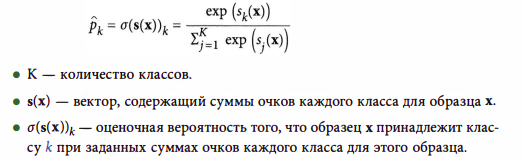

А прогноз логистической регрессии будет выглядеть следующим образом: 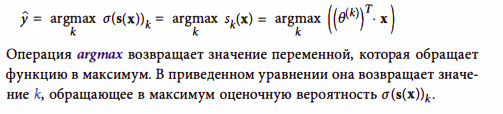

Теперь мы будем предсказывать не churn, а country. Просто потому, что у нас три класса country - France, Germany, Spain

In [ ]:
df_multiclass = pd.read_csv('logreg.csv')
df_multiclass.head()

In [ ]:
## Task0: закодируйте категориальные переменные,кроме целевой метки, потому что линейные модели с ними работать не умеют. Можете использовать либо pd.get_dummies, либо sklearn OneHotEncoder

In [ ]:
y = df_multiclass['country']
X = df_multiclass.drop('country', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle=True)

У нас все так же есть дисбаланс классов, потому что количество семплов с country='Spain' сильно больше, чем всех остальных

In [ ]:
clf = LogisticRegression(class_weight='balanced', random_state=42, multi_class='multinomial', solver='lbfgs')

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
cr = classification_report(y_test,y_pred)
print(cr)

In [ ]:
## Task1: попробуйте справиться с дисбалансом классов, используя статью выше

In [4]:
## Task2: попробуйте подобрать параметры для многоклассовой классификации с помощью GridSearchCV